In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import pandas as pd
import warnings
import statsmodels.formula.api as smf
warnings.simplefilter('ignore', FutureWarning)

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [4]:
pd.options.display.max_rows = 300

In [5]:
pd.options.display.max_columns = 200

In [6]:
# Read in CSV files
covid = pd.read_csv('../COVID-19-Predictive-Modelling/assets/data/COVID County Data/COVID_data_on_lockdown_plus_30.csv')
social = pd.read_csv('../COVID-19-Predictive-Modelling/assets/data/SVI2018_US_COUNTY_2.csv')
employment = pd.read_csv('../COVID-19-Predictive-Modelling/assets/data/AGS_data/AGS_Data_Massaged3.csv')

In [7]:
covid.dtypes

Unnamed: 0            int64
name                 object
date                 object
fips                float64
lat                 float64
long                float64
confirmed             int64
deaths                int64
confirmed_diff        int64
deaths_diff           int64
state                object
state_abbr           object
lockdown_date        object
lockdown_plus_30     object
dtype: object

In [8]:
covid.head()

,Unnamed: 0,name,date,fips,lat,long,confirmed,deaths,confirmed_diff,deaths_diff,state,state_abbr,lockdown_date,lockdown_plus_30
0,2808,Autauga,2020-05-03,1001.0,32.539527,-86.644082,48,3,3,0,Alabama,AL,2020-04-03,2020-05-03
1,2809,Baldwin,2020-05-03,1003.0,30.727750,-87.722071,187,4,6,0,Alabama,AL,2020-04-03,2020-05-03
2,2810,Barbour,2020-05-03,1005.0,31.868263,-85.387129,45,1,2,0,Alabama,AL,2020-04-03,2020-05-03
3,2811,Bibb,2020-05-03,1007.0,32.996421,-87.125115,43,0,1,0,Alabama,AL,2020-04-03,2020-05-03
4,2812,Blount,2020-05-03,1009.0,33.982109,-86.567906,40,0,0,0,Alabama,AL,2020-04-03,2020-05-03


In [9]:
covid.drop('Unnamed: 0', axis=1, inplace=True)
covid.head()

,name,date,fips,lat,long,confirmed,deaths,confirmed_diff,deaths_diff,state,state_abbr,lockdown_date,lockdown_plus_30
0,Autauga,2020-05-03,1001.0,32.539527,-86.644082,48,3,3,0,Alabama,AL,2020-04-03,2020-05-03
1,Baldwin,2020-05-03,1003.0,30.727750,-87.722071,187,4,6,0,Alabama,AL,2020-04-03,2020-05-03
2,Barbour,2020-05-03,1005.0,31.868263,-85.387129,45,1,2,0,Alabama,AL,2020-04-03,2020-05-03
3,Bibb,2020-05-03,1007.0,32.996421,-87.125115,43,0,1,0,Alabama,AL,2020-04-03,2020-05-03
4,Blount,2020-05-03,1009.0,33.982109,-86.567906,40,0,0,0,Alabama,AL,2020-04-03,2020-05-03


In [10]:
covid.fips = covid.fips.values.astype(float).astype(int).astype(str)
covid.head()

,name,date,fips,lat,long,confirmed,deaths,confirmed_diff,deaths_diff,state,state_abbr,lockdown_date,lockdown_plus_30
0,Autauga,2020-05-03,1001,32.539527,-86.644082,48,3,3,0,Alabama,AL,2020-04-03,2020-05-03
1,Baldwin,2020-05-03,1003,30.727750,-87.722071,187,4,6,0,Alabama,AL,2020-04-03,2020-05-03
2,Barbour,2020-05-03,1005,31.868263,-85.387129,45,1,2,0,Alabama,AL,2020-04-03,2020-05-03
3,Bibb,2020-05-03,1007,32.996421,-87.125115,43,0,1,0,Alabama,AL,2020-04-03,2020-05-03
4,Blount,2020-05-03,1009,33.982109,-86.567906,40,0,0,0,Alabama,AL,2020-04-03,2020-05-03


In [11]:
social.head()

,ST,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ
0,35,NEW MEXICO,Rio Arriba,35039,5860.869195,39307,20044,12398,-999,-999,-999,3669,7083,9318,6280,1330,34397,755,67,7770,264,763,654
1,1,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546
2,1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543
3,1,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322
4,1,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112


In [12]:
social.dtypes

ST             int64
STATE         object
COUNTY        object
fips           int64
AREA_SQMI    float64
E_TOTPOP       int64
E_HU           int64
E_HH           int64
E_POV          int64
E_UNEMP        int64
E_PCI          int64
E_NOHSDP       int64
E_AGE65        int64
E_AGE17        int64
E_DISABL       int64
E_SNGPNT       int64
E_MINRTY       int64
E_LIMENG       int64
E_MUNIT        int64
E_MOBILE       int64
E_CROWD        int64
E_NOVEH        int64
E_GROUPQ       int64
dtype: object

In [13]:
social.fips = social.fips.values.astype(str)
social.dtypes

ST             int64
STATE         object
COUNTY        object
fips          object
AREA_SQMI    float64
E_TOTPOP       int64
E_HU           int64
E_HH           int64
E_POV          int64
E_UNEMP        int64
E_PCI          int64
E_NOHSDP       int64
E_AGE65        int64
E_AGE17        int64
E_DISABL       int64
E_SNGPNT       int64
E_MINRTY       int64
E_LIMENG       int64
E_MUNIT        int64
E_MOBILE       int64
E_CROWD        int64
E_NOVEH        int64
E_GROUPQ       int64
dtype: object

In [14]:
employment.head()

,county_code,county_name,labor_force,file_week_ended,percent_unemployed,total_unemployed
0,1001,Autauga County,25819,2020-03-07,2.67,690
1,1001,Autauga County,25819,2020-03-14,2.75,710
2,1001,Autauga County,25819,2020-03-21,3.21,828
3,1001,Autauga County,25819,2020-03-28,6.60,1703
4,1001,Autauga County,25819,2020-04-04,11.07,2857


In [15]:
employment.dtypes

county_code             int64
county_name            object
labor_force             int64
file_week_ended        object
percent_unemployed    float64
total_unemployed        int64
dtype: object

In [16]:
employment = employment.rename(columns={'county_code': 'fips'})

In [17]:
employment.fips = employment.fips.values.astype(str)
employment.dtypes

fips                   object
county_name            object
labor_force             int64
file_week_ended        object
percent_unemployed    float64
total_unemployed        int64
dtype: object

In [18]:
# For the SVI, -999 reflects missing values. Apparantly, only one county has -999 vaules in their dataset, so removing.
social =  social[(social.iloc[:, 1:] != -999).all(axis=1)]
social.head()

,ST,STATE,COUNTY,fips,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ
1,1,ALABAMA,Autauga,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546
2,1,ALABAMA,Blount,1009,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543
3,1,ALABAMA,Butler,1013,776.838201,20025,10026,6708,4640,567,20430,2141,3806,4566,3492,704,9641,93,134,2625,119,520,322
4,1,ALABAMA,Calhoun,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,19386,25196,23598,4701,31675,1076,1990,7904,772,2599,3112
5,1,ALABAMA,Chambers,1017,596.560643,33826,16981,13516,5531,773,22827,4383,6409,7006,5570,1307,14954,36,679,2378,404,989,512


In [19]:
# Merge covid and social on fips
covsoc = pd.merge(covid, social, on='fips')
covsoc.head()

,name,date,fips,lat,long,confirmed,deaths,confirmed_diff,deaths_diff,state,state_abbr,lockdown_date,lockdown_plus_30,ST,STATE,COUNTY,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ
0,Autauga,2020-05-03,1001,32.539527,-86.644082,48,3,3,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Autauga,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546
1,Baldwin,2020-05-03,1003,30.727750,-87.722071,187,4,6,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Baldwin,1589.793007,208107,111945,78622,21653,4343,31203,14310,40665,45677,28863,4508,35339,1068,20492,13075,991,2705,3014
2,Barbour,2020-05-03,1005,31.868263,-85.387129,45,1,2,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Barbour,885.001636,25782,11937,9186,6597,918,18461,4901,4634,5436,5078,1174,13884,398,152,3484,313,849,2900
3,Bibb,2020-05-03,1007,32.996421,-87.125115,43,0,1,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Bibb,622.461089,22527,9161,6840,2863,658,20199,2650,3661,4659,3412,407,5726,57,222,2615,52,410,2091
4,Blount,2020-05-03,1009,33.982109,-86.567906,40,0,0,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Blount,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543


In [20]:
covsoc.shape

(2518, 35)

In [21]:
# Note that total population in these calculations is from the SVI, which was conducted 2014-2018. So, it's not the current number, but an approximation. 
covsoc['percent_confirmed'] = ((covsoc['confirmed'] / covsoc['E_TOTPOP'].sum())*100).round(10).astype(str)

In [22]:
covsoc['percent_deaths'] = ((covsoc['deaths'] / covsoc['E_TOTPOP'].sum())*100).round(10).astype(str)

In [23]:
covsoc.head()

,name,date,fips,lat,long,confirmed,deaths,confirmed_diff,deaths_diff,state,state_abbr,lockdown_date,lockdown_plus_30,ST,STATE,COUNTY,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,E_DISABL,E_SNGPNT,E_MINRTY,E_LIMENG,E_MUNIT,E_MOBILE,E_CROWD,E_NOVEH,E_GROUPQ,percent_confirmed,percent_deaths
0,Autauga,2020-05-03,1001,32.539527,-86.644082,48,3,3,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Autauga,594.443459,55200,23315,21115,8422,1065,29372,4204,8050,13369,10465,1586,13788,426,886,4279,299,1191,546,1.58297e-05,9.894e-07
1,Baldwin,2020-05-03,1003,30.727750,-87.722071,187,4,6,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Baldwin,1589.793007,208107,111945,78622,21653,4343,31203,14310,40665,45677,28863,4508,35339,1068,20492,13075,991,2705,3014,6.16697e-05,1.3191e-06
2,Barbour,2020-05-03,1005,31.868263,-85.387129,45,1,2,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Barbour,885.001636,25782,11937,9186,6597,918,18461,4901,4634,5436,5078,1174,13884,398,152,3484,313,849,2900,1.48403e-05,3.298e-07
3,Bibb,2020-05-03,1007,32.996421,-87.125115,43,0,1,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Bibb,622.461089,22527,9161,6840,2863,658,20199,2650,3661,4659,3412,407,5726,57,222,2615,52,410,2091,1.41807e-05,0.0
4,Blount,2020-05-03,1009,33.982109,-86.567906,40,0,0,0,Alabama,AL,2020-04-03,2020-05-03,1,ALABAMA,Blount,644.830460,57645,24222,20600,8220,909,22656,7861,10233,13468,8114,1437,7413,934,211,6108,339,856,543,1.31914e-05,0.0


In [46]:
covsoc.to_csv('../covsoc.csv')

In [24]:
# Model 1: Linear regression predicting confirmed (summed count) from SVI
X = covsoc[['AREA_SQMI','E_HU', 'E_HH', 'E_POV', 'E_UNEMP', 'E_PCI', 'E_NOHSDP', 'E_AGE65', 'E_AGE17', 'E_DISABL', 'E_SNGPNT', 'E_MINRTY', 'E_LIMENG', 'E_MUNIT', 'E_MOBILE', 'E_CROWD', 'E_NOVEH', 'E_GROUPQ']]

In [25]:
Y = covsoc['confirmed'].values.reshape(-1,1)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
score = model.score(X, Y)
print(f"R2 Score: {score}")

R2 Score: 0.8801289785774624


In [50]:
model = smf.ols(formula='Y ~ X', data=covsoc)

In [51]:
results = model.fit()

In [52]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1019.
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        15:57:27   Log-Likelihood:                -21149.
No. Observations:                2518   AIC:                         4.234e+04
Df Residuals:                    2499   BIC:                         4.245e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -221.8443    109.396     -2.028      0.0

In [30]:
# Model 2: Linear regression predicting confirmed_percentage (percentage from total population) from SVI
X2 = covsoc[['AREA_SQMI', 'E_HU', 'E_HH', 'E_POV', 'E_UNEMP', 'E_PCI', 'E_NOHSDP', 'E_AGE65', 'E_AGE17', 'E_DISABL', 'E_SNGPNT', 'E_MINRTY', 'E_LIMENG', 'E_MUNIT', 'E_MOBILE', 'E_CROWD', 'E_NOVEH', 'E_GROUPQ']]

In [31]:
Y2 = covsoc['percent_confirmed'].values.reshape(-1,1)

In [32]:
model2 = LinearRegression()

In [33]:
model2.fit(X2, Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
score = model2.score(X2, Y2)
print(f"R2 Score: {score}")

R2 Score: 0.8801289788154453


In [35]:
# Model 3: Linear regression predicting deaths from SVI
X3 = covsoc[['AREA_SQMI', 'E_HU', 'E_HH', 'E_POV', 'E_UNEMP', 'E_PCI', 'E_NOHSDP', 'E_AGE65', 'E_AGE17', 'E_DISABL', 'E_SNGPNT', 'E_MINRTY', 'E_LIMENG', 'E_MUNIT', 'E_MOBILE', 'E_CROWD', 'E_NOVEH', 'E_GROUPQ']]

In [36]:
Y3 = covsoc['deaths'].values.reshape(-1,1)

In [37]:
model3 = LinearRegression()

In [38]:
model3.fit(X3, Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
score = model3.score(X3, Y3)
print(f"R2 Score: {score}")

R2 Score: 0.9111858810765072


In [55]:
model3 = smf.ols(formula='Y3 ~ X3', data=covsoc)

In [56]:
results = model3.fit()

In [57]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y3   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1424.
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        16:01:25   Log-Likelihood:                -14842.
No. Observations:                2518   AIC:                         2.972e+04
Df Residuals:                    2499   BIC:                         2.983e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.2620      8.936     -3.834      0.0

In [40]:
# Model 3: Linear regression predicting percent_deaths from SVI
X4 = covsoc[['AREA_SQMI', 'E_HU', 'E_HH', 'E_POV', 'E_UNEMP', 'E_PCI', 'E_NOHSDP', 'E_AGE65', 'E_AGE17', 'E_DISABL', 'E_SNGPNT', 'E_MINRTY', 'E_LIMENG', 'E_MUNIT', 'E_MOBILE', 'E_CROWD', 'E_NOVEH', 'E_GROUPQ']]

In [41]:
Y4 = covsoc['percent_deaths'].values.reshape(-1,1)

In [42]:
model4 = LinearRegression()

In [43]:
model4.fit(X4, Y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
score = model4.score(X4, Y4)
print(f"R2 Score: {score}")

R2 Score: 0.9111858805398244


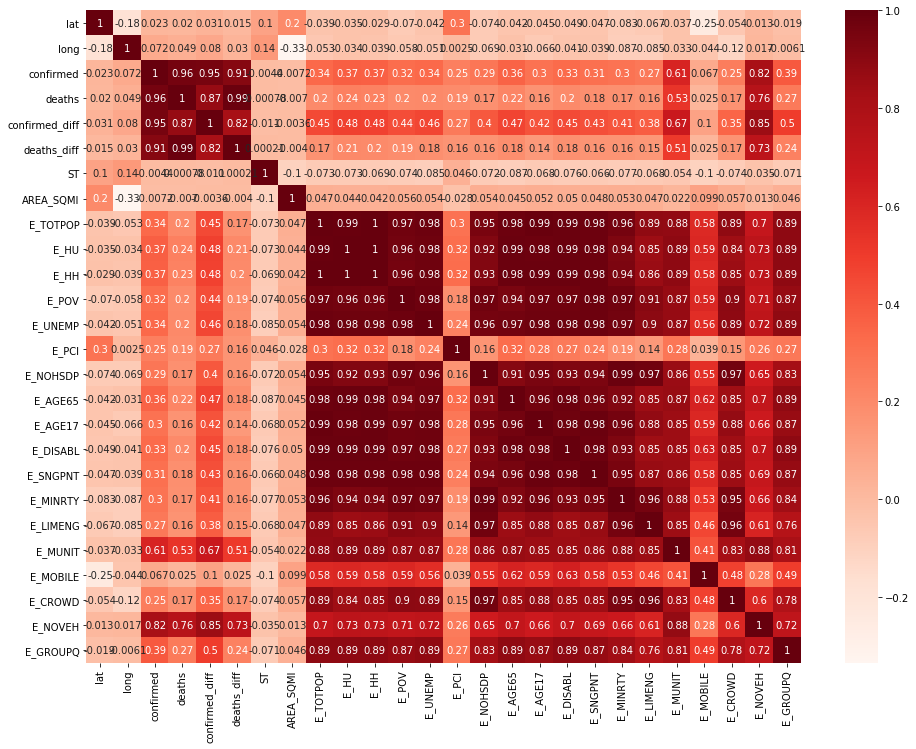

In [45]:
# Pearson correlation matrix
import seaborn as sns
plt.figure(figsize=(16,12))
cor = covsoc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()